# Graham scan algorithm

In [1]:
import math

def centroid(triangle):
    # Reference to https://www.mathopenref.com/coordcentroid.html 
    return [sum([i[0] for i in triangle]) / 3, sum([i[1] for i in triangle]) / 3]

def slope(p1, p2):
    return (p1[1] - p2[1]) / (p1[0] - p2[0]) if p1[0] - p2[0] != 0 else math.inf

def collinear(points):
    # The property of collinear points is that given a set of points {s1, s2 , ... , sn}, the gradient between any two points are equal 
    s1, s2, s3 = slope(points[0], points[1]), slope(points[0], points[2]), slope(points[1], points[2])
    return s1 == s2 and s2 == s3 and s1 == s3

def pyth(p1, p2):
    # Calculates the distance between two points in the R^2 vector space using Pythagorous' 
    return math.sqrt(math.pow((p1[0] - p2[0]), 2) + math.pow((p1[1] - p2[1]), 2))

def changerange(theta):
    # The paper used the range of radians to be between [0, 2pi), but the math library uses [-pi, pi) 
    return theta if theta >= 0 else math.tau + theta

def midtest(points):
    # Finds the midpoint between 3 collinear points, returns two points which has the longest distance 
    distances = [pyth(points[0], points[1]), pyth(points[0], points[2]), pyth(points[1], points[2])]
    if max(distances) == distances[0]:
        return [points[0], points[1]]
    return [points[0], points[2]] if max(distances) == distances[1] else [points[1], points[2]]

def calcP(inputSet):
    # Finds the point P 
    while collinear(inputSet[:3:]) and len(inputSet) > 3:
        inputSet = midtest(inputSet[:3:]) + inputSet[3::]
    return centroid(inputSet[:3:])

def polar(coordinates):
    return [pyth(coordinates, [0,0]), changerange(math.atan2(coordinates[1], coordinates[0]))]

def cartesianList(polarHull, P):
    return [[round(j) for j in cartesian(i, P)] for i in polarHull]

def resetOrigin(P, inputSet):
    return [polar([i[0]-P[0], i[1]-P[1]]) for i in inputSet]

def cartesian(coordinates, P):
    return [(coordinates[0] * math.cos(coordinates[1])) + P[0], (coordinates[0] * math.sin(coordinates[1])) + P[1]]

def qsort(inputSet):
    # This sorts the set of coordinates by their angle using quick sort
    return qsort([i for i in inputSet[1::] if i[1] < inputSet[0][1]]) + [inputSet[0]] + qsort([i for i in inputSet[1::] if i[1] >= inputSet[0][1]]) if len(inputSet) != 0 else []

def maxr(inputSet, threshold=1e-8):
    # This function selects the polar coordinate with same angle as others but has the largest magnitude recursively
    # A threshold default argument has been added to prevent floating point arithmetic errors
    polar, curtheta = [], -math.inf
    for i in inputSet:
        if abs(i[1] - curtheta) < threshold:
            polar[-1][0] = max(i[0], polar[-1][0])
        else:
            polar.append(i)
            curtheta = i[1]
    return polar

def deletenomag(inputSet):
    # This function removes the polar coordinates with no magnitude
    return [i for i in inputSet if i[0] != 0]

def calcAngle(coor1, coor2):
    # Note that c is the side oppositing the angle to be found using the cosine rule
    a, b, c = coor1[0], pyth(cartesian(coor1, [0, 0]), cartesian(coor2, [0, 0])), coor2[0]
    try:
        return math.acos((a**2 + b**2 - c**2) / (2*a*b))
    except ValueError:  
        '''
        The only possible way to get a ValueError is when a, b and c cannot form a triangle.  Notice that under the context
        of this function the only possible way to get a ValueError is when | arg(coor2) - arg(coor1) | is an element of {0, -pi}.
        Since it is not possible that it equals 0, since it would have been deleted from the function maxr, therefore the only
        possible way valuation is -pi.
        '''
        return -math.pi

    except ZeroDivisionError:
        print (cartesian(coor1, [0, 0]), cartesian(coor2, [0, 0]))
        quit()

def trace(inputSet):
    pointer, tracker = 1, [i for i in inputSet]
    # Tracker is explicitly defined this way to prevent affecting the inputSet during running
    while tracker != []:
        p1, p2, p3 = (pointer-1) % len(inputSet), pointer % len(inputSet), (pointer+1) % len(inputSet)
        if calcAngle(inputSet[p2], inputSet[p1]) + calcAngle(inputSet[p2], inputSet[p3]) >= math.pi:
            toremove = inputSet[p2]
            inputSet.remove(toremove)
            pointer -= 1
        else:
            toremove = inputSet[p1]
            pointer += 1
        try:
            tracker.remove(toremove)
        except ValueError:
            pass
    return inputSet

def grahamscan(inputSet):
    P = calcP(inputSet)
    polarSet = qsort(resetOrigin(P, inputSet))
    polarSet = deletenomag(maxr(polarSet))
    polarHull = trace(polarSet)
    # The Modulus of the Polar Coordinate is set to -1 to force it to be replaced on the first recursive flow of maxr since it is not possible that the magnitude is -1
    return cartesianList(polarHull, P) # the program converts the polar coordinates to cartesian during output

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random

#code for random data generation
def randGeneration(n, lb=0, ub=32767):
    return [[random.randint(lb, ub), random.randint(lb, ub)] for i in range(n)]

#code for worst case data generation
def randWorstGeneration(n):
    return [[0,0] for i in range(n)]

Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [3]:
import timeit

#test code
def test(n, worstCase=False, repeats=1):
    timetaken = [0 for i in range(len(n))]
    for j in range(repeats):
        for i in n:
            data = randWorstGeneration(int(i)) if worstCase else randGeneration(int(i))
            start_time = timeit.default_timer()
            _ = grahamscan(data)
            timetaken[n.index(i)] = timeit.default_timer() - start_time
    return [i/repeats for i in timetaken]

n = [1e2, 5e2, 1e3, 5e3, 1e4, 1.5e4, 2e4]
r_timetaken = test(n)
#w_timetaken = test(n, worstCase = True)

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

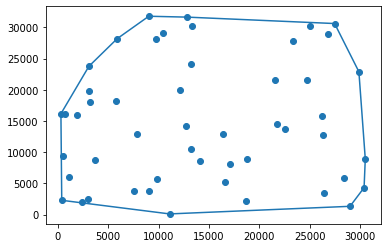

In [8]:
import matplotlib.pyplot as plt

#inputSet = [[1,1], [2,2], [3,3], [4,4], [1,4], [3,1], [1,5], [2,4], [3,5]]
#outputSet = [[1,1], [3,1], [4,4], [3,5], [1,5]]

inputSet = randGeneration(50)
outputSet = grahamscan(inputSet)

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet)
plt.plot(output_xs, output_ys) 

plt.show() 